# DOC DU LIEU 

In [1]:
import numpy as np 
import cv2
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras import models
from keras.models import load_model
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler 

In [2]:
dataset = pd.read_csv("./data.csv")
x_data = dataset.drop('0',axis = 1)
y_data = dataset['0']

# TIỀN XỬ LÝ DỮ LIỆU

## Mô tả dữ liệu

In [3]:
x_data = np.array(x_data)
y_data = np.array(y_data)
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ"

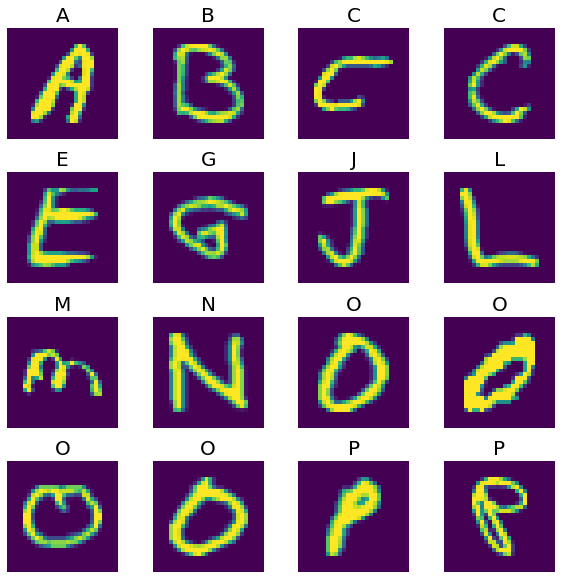

In [5]:
plt.figure(figsize=(10, 10))
a= 0;
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(x_data[a].reshape(28,28))
    plt.title(alphabets[y_data[a]], fontsize=20)
    a = a+ 14326
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.3)

## Phân chia dữ liệu

In [4]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

# XÂY DỰNG MODEL 

## Cnn

### Chuẩn bị dữ liệu

In [5]:
x_train_cnn = np.array(x_train).reshape(-1, 28 , 28, 1).astype('float32')
x_val_cnn = np.array(x_val).reshape(-1, 28 , 28, 1).astype('float32')
x_test_cnn = np.array(x_test).reshape(-1, 28 , 28, 1).astype('float32')

In [6]:
y_train_cnn = np_utils.to_categorical(y_train)
y_val_cnn = np_utils.to_categorical(y_val)
y_test_cnn = np_utils.to_categorical(y_test)

In [11]:
y_train_cnn.shape

(238368, 26)

### Mo hinh CNN1

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(64, (3, 3),  activation='relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(26, activation='softmax'))
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn), epochs=18, batch_size=200, verbose=2)

Epoch 1/18
1192/1192 - 124s - loss: 0.9119 - accuracy: 0.8224 - val_loss: 0.1193 - val_accuracy: 0.9670 - 124s/epoch - 104ms/step
Epoch 2/18
1192/1192 - 133s - loss: 0.1494 - accuracy: 0.9571 - val_loss: 0.0850 - val_accuracy: 0.9763 - 133s/epoch - 112ms/step
Epoch 3/18
1192/1192 - 123s - loss: 0.1106 - accuracy: 0.9676 - val_loss: 0.0683 - val_accuracy: 0.9814 - 123s/epoch - 103ms/step
Epoch 4/18
1192/1192 - 119s - loss: 0.0963 - accuracy: 0.9721 - val_loss: 0.0629 - val_accuracy: 0.9822 - 119s/epoch - 99ms/step
Epoch 5/18
1192/1192 - 117s - loss: 0.0848 - accuracy: 0.9750 - val_loss: 0.0583 - val_accuracy: 0.9843 - 117s/epoch - 98ms/step
Epoch 6/18
1192/1192 - 116s - loss: 0.0774 - accuracy: 0.9771 - val_loss: 0.0537 - val_accuracy: 0.9850 - 116s/epoch - 98ms/step
Epoch 7/18
1192/1192 - 119s - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0551 - val_accuracy: 0.9846 - 119s/epoch - 100ms/step
Epoch 8/18
1192/1192 - 117s - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.0514 - val_accura

In [ ]:
model1.save("model1cnn.h5")

In [ ]:
y_prediction_cnn1 = model1.predict(
      x=x_val_cnn
    , batch_size=200
    , verbose=2
)
y_prediction_cnn1 = np.argmax(y_prediction_cnn1, axis=-1)

298/298 - 8s - 8s/epoch - 26ms/step


In [ ]:
# cnn = load_model("model1cnn.h5")
# loss, acc = cnn.evaluate(x_val_cnn, y_val_cnn)

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_cnn1)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_cnn1)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.9897469458987783
Độ chính xác cân bằng của mô hình: 0.9865959403700425


### Mo hinh CNN2

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(26, activation='softmax'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               589952    
                                                                 
 dense_10 (Dense)            (None, 26)                3354      
                                                      

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn), epochs=18, batch_size=200, verbose=2)

Epoch 1/18
1192/1192 - 69s - loss: 0.8532 - accuracy: 0.8580 - val_loss: 0.1277 - val_accuracy: 0.9660 - 69s/epoch - 58ms/step
Epoch 2/18
1192/1192 - 73s - loss: 0.1312 - accuracy: 0.9628 - val_loss: 0.0938 - val_accuracy: 0.9747 - 73s/epoch - 61ms/step
Epoch 3/18
1192/1192 - 69s - loss: 0.1033 - accuracy: 0.9702 - val_loss: 0.0803 - val_accuracy: 0.9784 - 69s/epoch - 58ms/step
Epoch 4/18
1192/1192 - 62s - loss: 0.0909 - accuracy: 0.9737 - val_loss: 0.0737 - val_accuracy: 0.9800 - 62s/epoch - 52ms/step
Epoch 5/18
1192/1192 - 67s - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.0749 - val_accuracy: 0.9802 - 67s/epoch - 56ms/step
Epoch 6/18
1192/1192 - 66s - loss: 0.0782 - accuracy: 0.9770 - val_loss: 0.0789 - val_accuracy: 0.9799 - 66s/epoch - 56ms/step
Epoch 7/18
1192/1192 - 61s - loss: 0.0723 - accuracy: 0.9787 - val_loss: 0.0758 - val_accuracy: 0.9796 - 61s/epoch - 52ms/step
Epoch 8/18
1192/1192 - 66s - loss: 0.0688 - accuracy: 0.9798 - val_loss: 0.0716 - val_accuracy: 0.9810 - 66s/ep

In [ ]:
model2.save("model2cnn.h5")

In [ ]:
y_prediction_cnn2 = model2.predict(
      x=x_val_cnn
    , batch_size=200
    , verbose=2
)
y_prediction_cnn2 = np.argmax(y_prediction_cnn2, axis=-1)

298/298 - 5s - 5s/epoch - 15ms/step


In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_cnn2)
print("\nĐộ chính xác của mô hình:", accuracy)
balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_cnn2)
print("Độ chính xác cân bằng của mô hình:", balanced_acc)


Độ chính xác của mô hình: 0.985031547858773
Độ chính xác cân bằng của mô hình: 0.9772726538534595


### Mo hinh cnn3

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model3.add(Conv2D(64, (3, 3),  activation='relu', padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3),  activation='relu', padding = 'same'))
model3.add(Conv2D(64, (3, 3),  activation='relu', padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3),  activation='relu', padding = 'same'))
model3.add(Conv2D(64, (3, 3),  activation='relu', padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.8))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(26, activation='softmax'))
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 32)        18464     
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                 

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model3.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn), epochs=18, batch_size=200, verbose=2)

Epoch 1/18
1192/1192 - 397s - loss: 0.5623 - accuracy: 0.8411 - val_loss: 0.0896 - val_accuracy: 0.9751 - 397s/epoch - 333ms/step
Epoch 2/18
1192/1192 - 368s - loss: 0.1651 - accuracy: 0.9525 - val_loss: 0.0675 - val_accuracy: 0.9815 - 368s/epoch - 309ms/step
Epoch 3/18
1192/1192 - 370s - loss: 0.1262 - accuracy: 0.9646 - val_loss: 0.0622 - val_accuracy: 0.9827 - 370s/epoch - 311ms/step
Epoch 4/18
1192/1192 - 369s - loss: 0.1097 - accuracy: 0.9695 - val_loss: 0.0589 - val_accuracy: 0.9839 - 369s/epoch - 309ms/step
Epoch 5/18
1192/1192 - 368s - loss: 0.0968 - accuracy: 0.9727 - val_loss: 0.0551 - val_accuracy: 0.9853 - 368s/epoch - 309ms/step
Epoch 6/18
1192/1192 - 368s - loss: 0.0912 - accuracy: 0.9746 - val_loss: 0.0487 - val_accuracy: 0.9870 - 368s/epoch - 309ms/step
Epoch 7/18
1192/1192 - 363s - loss: 0.0846 - accuracy: 0.9768 - val_loss: 0.0560 - val_accuracy: 0.9849 - 363s/epoch - 305ms/step
Epoch 8/18
1192/1192 - 365s - loss: 0.0783 - accuracy: 0.9783 - val_loss: 0.0530 - val_acc

In [ ]:
model3.save("model3cnn.h5")

In [ ]:
y_prediction_cnn3 = model3.predict(
      x=x_val_cnn
    , batch_size=200
    , verbose=2
)
y_prediction_cnn3 = np.argmax(y_prediction_cnn3, axis=-1)

298/298 - 24s - 24s/epoch - 81ms/step


In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_cnn3)
print("\nĐộ chính xác của mô hình:", accuracy)
balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_cnn3)
print("Độ chính xác cân bằng của mô hình:", balanced_acc)


Độ chính xác của mô hình: 0.988840783997852
Độ chính xác cân bằng của mô hình: 0.984727822070752


## Knn

### Chuẩn bị dữ liệu

In [5]:
x_train_knn = np.array(x_train).reshape(-1,784).astype('float32')
x_val_knn = np.array(x_val).reshape(-1,784).astype('float32')
x_test_knn = np.array(x_test).reshape(-1,784).astype('float32')

### Xây dựng model voi n_neighbors khac nhau

#### n_neighbors=1

In [ ]:
# n_neighbors = 1
model4 = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
model4.fit(x_train_knn, y_train)
y_prediction_knn1 = model4.predict(x_val)

In [ ]:
pickle.dump(y_prediction_knn1, open('y_prediction_knn1', 'wb'))
# y_pred = pickle.load(open('y_prediction_knn1', 'rb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_knn1)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_knn1)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)



Độ chính xác của mô hình: 0.9784534836890858
Độ chính xác cân bằng của mô hình: 0.9641727003160447


#### n_neighbors=3

In [ ]:
# n_neighbors = 3
model4 = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model4.fit(x_train_knn, y_train)
y_prediction_knn2 = model4.predict(x_val)

In [ ]:
pickle.dump(y_prediction_knn2, open('y_prediction_knn2', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_knn2)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_knn2)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.9558329977178145
Độ chính xác cân bằng của mô hình: 0.9290610868394575


#### n_neighbors=5

In [ ]:
# n_neighbors = 5
model6 = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model6.fit(x_train_knn, y_train)
y_prediction_knn3 = model6.predict(x_val)

In [ ]:
pickle.dump(y_prediction_knn3, open('y_prediction_knn3', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_knn3)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_knn3)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.9563867633239361
Độ chính xác cân bằng của mô hình: 0.9284461653816577


#### n_neighbors=10

In [ ]:
# n_neighbors = 10
model7 = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
model7.fit(x_train_knn, y_train)
y_prediction_knn4 = model7.predict(x_val)

In [ ]:
pickle.dump(y_prediction_knn4, open('y_prediction_knn4', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_knn4)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_knn4)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.9497751376023628
Độ chính xác cân bằng của mô hình: 0.9157984704889557


### Xây dựng model voi n_neighbors = 1 va metric khac nhau

#### metric='minkowski'

In [ ]:
model8 = KNeighborsClassifier(n_neighbors=1,metric='minkowski')
model8.fit(x_train_knn, y_train)
y_prediction_knn5 = model8.predict(x_val)

In [ ]:
pickle.dump(y_prediction_knn5, open('y_prediction_knn5', 'wb'))

In [ ]:
pickle.dump(model8, open('model8knn', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_knn5)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_knn5)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.9784534836890858
Độ chính xác cân bằng của mô hình: 0.9641727003160447


#### metric='manhattan'

In [ ]:
model9 = KNeighborsClassifier(n_neighbors=1,metric='manhattan')
model9.fit(x_train_knn, y_train)
y_prediction_knn6 = model9.predict(x_val)

In [ ]:
pickle.dump(y_prediction_knn6, open('y_prediction_knn6', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_knn6)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_knn6)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.973016512283528
Độ chính xác cân bằng của mô hình: 0.953262639620575


#### metric='chebyshev'

In [ ]:
model10 = KNeighborsClassifier(n_neighbors=1,metric='chebyshev')
model10.fit(x_train_knn, y_train)
y_prediction_knn7 = model10.predict(x_val)

In [ ]:
pickle.dump(y_prediction_knn7, open('y_prediction_knn7', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_knn7)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_knn7)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.9476439790575916
Độ chính xác cân bằng của mô hình: 0.9247580151668212


## Svm

### Chuan bi du lieu

In [15]:
x_train_svm = np.array(x_train).reshape(-1,784).astype('float32')
x_val_svm = np.array(x_val).reshape(-1,784).astype('float32')
x_test_svm = np.array(x_test).reshape(-1,784).astype('float32')

### kernel='poly'

In [ ]:
model11 = svm.SVC( C=10,kernel='poly' )
model11.fit(x_train_svm, y_train)

In [ ]:
y_prediction_svm1 = model11.predict(x_val_svm)

In [ ]:
pickle.dump(y_prediction_svm1, open('y_prediction_svm1', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_svm1)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_svm1)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.9861894213988455
Độ chính xác cân bằng của mô hình: 0.9793806674633898


### kernel='rbf'

In [16]:
model12 = svm.SVC( C=10,kernel='rbf' )
model12.fit(x_train_svm, y_train)

SVC(C=10)

In [ ]:
y_prediction_svm2 = model12.predict(x_val_svm)

In [ ]:
pickle.dump(y_prediction_svm2, open('y_prediction_svm2', 'wb'))

In [18]:
pickle.dump(model12, open('model12', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_svm2)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_svm2)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)


Độ chính xác của mô hình: 0.98986441133038
Độ chính xác cân bằng của mô hình: 0.9843973675262377


###  Su dung StandardScaler()

In [ ]:
sc = StandardScaler()
X_scaled_train_svm= x_train_svm
X_scaled_val_svm = x_val_svm
X_scaled_test_svm = x_test_svm
X_scaled_train_svm = sc.fit_transform(X_scaled_train_svm)
X_scaled_val_svm = sc.fit_transform(X_scaled_val_svm)
X_scaled_test_svm = sc.fit_transform(X_scaled_test_svm)

In [ ]:
model13 = svm.SVC( C=10,kernel='rbf' )
model13.fit(X_scaled_train_svm, y_train)
y_prediction_svm4 = model13.predict(X_scaled_val_svm)

In [ ]:
pickle.dump(y_prediction_svm4, open('y_prediction_svm4', 'wb'))

In [ ]:
accuracy = metrics.accuracy_score(y_val, y_prediction_svm4)
print("\nĐộ chính xác của mô hình:", accuracy)
model_balanced_acc = metrics.balanced_accuracy_score(y_val, y_prediction_svm4)
print("Độ chính xác cân bằng của mô hình:", model_balanced_acc)

# DANH GIA VA THU NGHIEM

## DANH GIA VOI TAP TRAIN

In [7]:
cnn = load_model("model1cnn.h5")
knn = pickle.load(open('model8knn', 'rb'))
svm = pickle.load(open('model12', 'rb'))

### CNN

In [8]:
y_pred_test_cnn= cnn.predict(x_test_cnn)
y_pred_test_cnn = np.argmax(y_pred_test_cnn, axis=-1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2806
           1       0.98      0.99      0.99      1673
           2       0.99      0.99      0.99      4742
           3       0.96      0.97      0.96      2044
           4       1.00      0.99      0.99      2214
           5       0.98      0.99      0.98       231
           6       0.98      0.97      0.98      1183
           7       0.98      0.98      0.98      1466
           8       0.98      0.99      0.99       237
           9       0.99      0.98      0.98      1668
          10       0.98      0.98      0.98      1132
          11       0.99      0.99      0.99      2319
          12       0.99      0.99      0.99      2487
          13       0.99      0.99      0.99      3756
          14       0.99      0.99      0.99     11629
          15       1.00      0.99      0.99      3868
          16       0.98      0.98      0.98      1159
          17       0.99    

C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


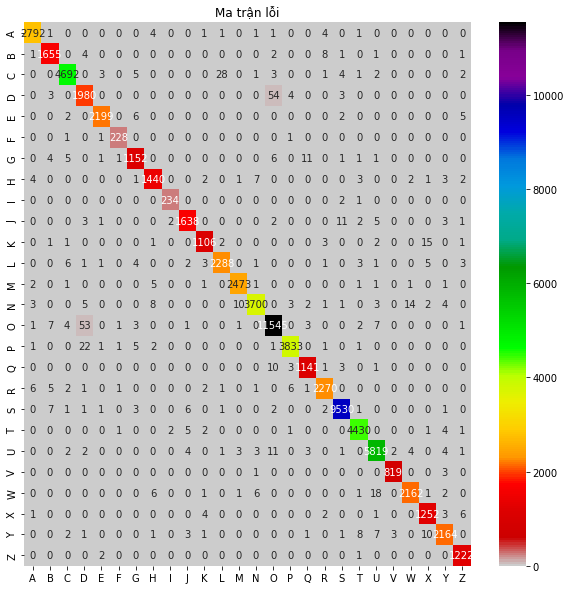

In [12]:
print(classification_report(y_test,y_pred_test_cnn))
print("accuracy Score : ", accuracy_score(y_test,y_pred_test_cnn))
print("Precision Score : ",precision_score(y_test,y_pred_test_cnn, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test,y_pred_test_cnn, 
                                           pos_label='positive',
                                           average='micro'))
print( "Recall Score : ",f1_score(y_test,y_pred_test_cnn,average='micro'))
fig, ax = plt.subplots(figsize=(10, 10))
x_axis_labels = alphabets
y_axis_labels = alphabets
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test_cnn)

sns = sns.heatmap(confusion_matrix, annot=True,xticklabels= alphabets , yticklabels= alphabets , cmap='nipy_spectral_r', fmt='g')
sns.set_title("Ma trận lỗi")
plt.show()

### KNN

In [8]:
y_pred_test_knn= knn.predict(x_test_knn)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2806
           1       0.98      0.94      0.96      1673
           2       0.97      0.99      0.98      4742
           3       0.97      0.95      0.96      2044
           4       0.99      0.95      0.97      2214
           5       0.95      0.90      0.93       231
           6       0.98      0.94      0.96      1183
           7       0.94      0.96      0.95      1466
           8       0.99      0.91      0.95       237
           9       0.96      0.95      0.95      1668
          10       0.97      0.96      0.96      1132
          11       0.96      0.99      0.98      2319
          12       0.99      0.97      0.98      2487
          13       0.97      0.98      0.98      3756
          14       0.98      0.99      0.99     11629
          15       0.96      0.99      0.98      3868
          16       0.98      0.91      0.95      1159
          17       0.98    

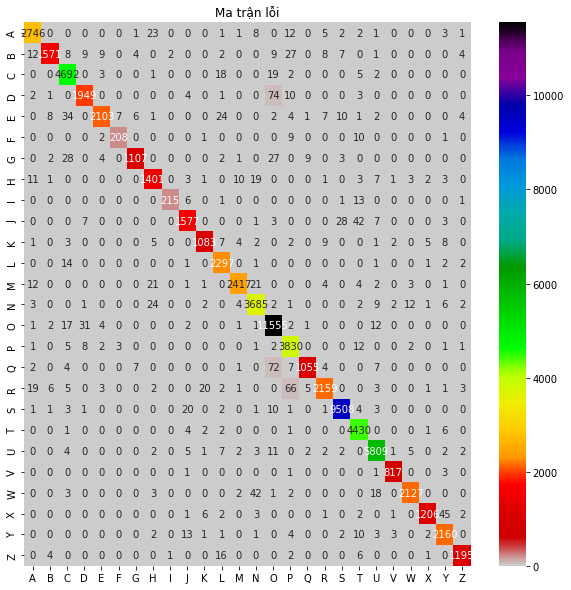

In [9]:
print(classification_report(y_test,y_pred_test_knn))
print("accuracy Score : ", accuracy_score(y_test,y_pred_test_knn))
print("Precision Score : ",precision_score(y_test,y_pred_test_knn, 
                                        #    pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test,y_pred_test_knn, 
                                        #    pos_label='positive',
                                           average='micro'))
print( "f1 Score : ",f1_score(y_test,y_pred_test_knn,average='micro'))

fig, ax = plt.subplots(figsize=(10, 10))
x_axis_labels = alphabets
y_axis_labels = alphabets
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test_knn)

sns = sns.heatmap(confusion_matrix, annot=True,xticklabels= alphabets , yticklabels= alphabets , cmap='nipy_spectral_r', fmt='g')
sns.set_title("Ma trận lỗi")
plt.show()

### SVM

In [21]:
y_pred_test_svm= svm.predict(x_test_svm) 

In [22]:
pickle.dump(y_pred_test_svm, open('y_pred_test_svm', 'wb'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2806
           1       0.98      0.98      0.98      1673
           2       0.99      0.99      0.99      4742
           3       0.97      0.98      0.98      2044
           4       0.99      0.98      0.99      2214
           5       0.99      0.97      0.98       231
           6       0.98      0.98      0.98      1183
           7       0.98      0.99      0.98      1466
           8       1.00      0.97      0.98       237
           9       0.98      0.97      0.98      1668
          10       0.98      0.98      0.98      1132
          11       0.99      0.99      0.99      2319
          12       0.99      0.99      0.99      2487
          13       0.99      0.99      0.99      3756
          14       0.99      1.00      0.99     11629
          15       0.99      1.00      0.99      3868
          16       0.99      0.97      0.98      1159
          17       0.99    

C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


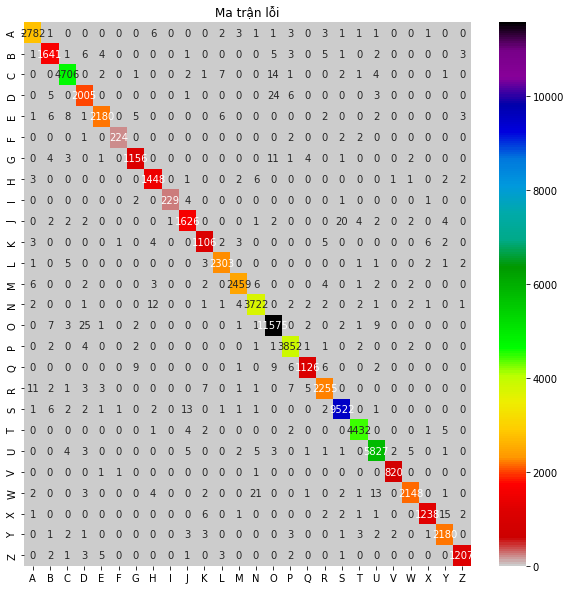

In [23]:
print(classification_report(y_test,y_pred_test_svm))
print("accuracy Score : ", accuracy_score(y_test,y_pred_test_svm))
print("Precision Score : ",precision_score(y_test,y_pred_test_svm, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test,y_pred_test_svm, 
                                           pos_label='positive',
                                           average='micro'))
print( "f1 Score : ",f1_score(y_test,y_pred_test_svm,average='micro'))

fig, ax = plt.subplots(figsize=(10, 10))
x_axis_labels = alphabets
y_axis_labels = alphabets
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test_svm)

sns = sns.heatmap(confusion_matrix, annot=True,xticklabels= alphabets , yticklabels= alphabets , cmap='nipy_spectral_r', fmt='g')
sns.set_title("Ma trận lỗi")
plt.show()

## DANH GIA VOI DU LIEU TU TAO

### Doc du lieu

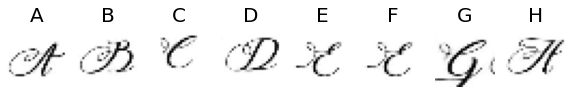

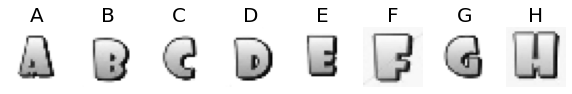

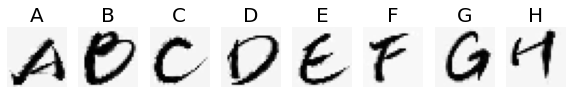

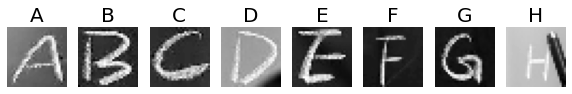

In [23]:
X_text1 = []
X_text2 = []
X_text3 = []
X_text4 = []
Y_text = [0,1,2,3,4,5,6,7]
dsize = (28,28)
for i in range(8):
    X_text1.append(cv2.imread('./text1/'+ str(i+1) +'.png', 0))
    X_text2.append(cv2.imread('./text2/'+ str(i+1) +'.png', 0))
    X_text3.append(cv2.imread('./text3/'+ str(i+1) +'.jpg', 0))
    X_text4.append(cv2.imread('./text4/'+ str(i+1) +'.jpg', 0))

plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    X_text1[i] = cv2.resize(X_text1[i], dsize)
    plt.imshow(X_text1[i], cmap = 'gray')
    plt.title(alphabets[Y_text[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    X_text2[i] = cv2.resize(X_text2[i], dsize)
    plt.imshow(X_text2[i], cmap = 'gray')
    plt.title(alphabets[Y_text[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1,8 , i+1)
    X_text3[i] = cv2.resize(X_text3[i], dsize)
    plt.imshow(X_text3[i], cmap = 'gray')
    plt.title(alphabets[Y_text[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)

plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    X_text4[i] = cv2.resize(X_text4[i], dsize)
    plt.imshow(X_text4[i], cmap = 'gray')
    plt.title(alphabets[Y_text[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)

### CNN

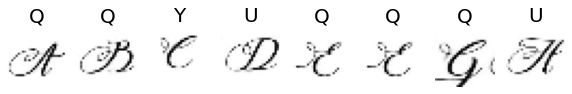

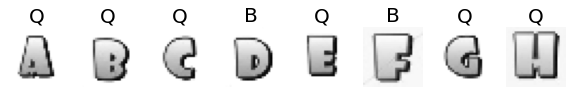

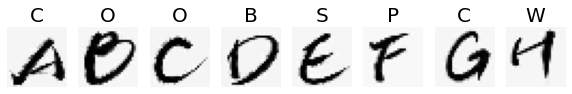

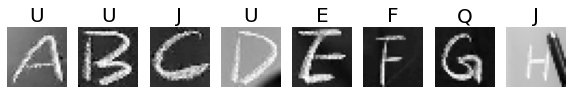

In [24]:
Y_text_cnn = []
for i in range(8):
    max_leng= np.zeros(26)
    max_leng[i]=1
    Y_text_cnn.append(max_leng)
X_text_cnn1 = np.array(X_text1).reshape(-1, 28 , 28, 1).astype('float32')
X_text_cnn2 = np.array(X_text2).reshape(-1, 28 , 28, 1).astype('float32')
X_text_cnn3 = np.array(X_text3).reshape(-1, 28 , 28, 1).astype('float32')
X_text_cnn4 = np.array(X_text4).reshape(-1, 28 , 28, 1).astype('float32')
cnn = load_model("model1cnn.h5")
y_pred_text1= cnn.predict(X_text_cnn1)
y_pred_text1 = np.argmax(y_pred_text1, axis=-1)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text1[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text1[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text2= cnn.predict(X_text_cnn2)
y_pred_text2 = np.argmax(y_pred_text2, axis=-1)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text2[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text2[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text3= cnn.predict(X_text_cnn3)
y_pred_text3 = np.argmax(y_pred_text3, axis=-1)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text3[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text3[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text4= cnn.predict(X_text_cnn4)
y_pred_text4 = np.argmax(y_pred_text4, axis=-1)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text4[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text4[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)

### KNN

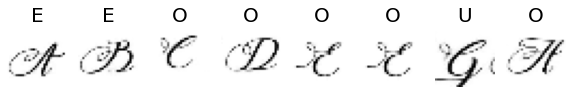

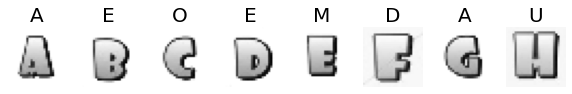

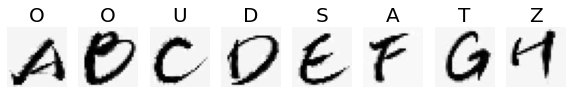

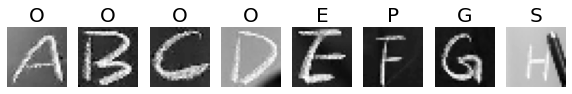

In [25]:
Y_text_knn = []
for i in range(8):
    max_leng= np.zeros(26)
    max_leng[i]=1
    Y_text_knn.append(max_leng)
X_text_knn1 = np.array(X_text1).reshape(-1,784).astype('float32')
X_text_knn2 = np.array(X_text2).reshape(-1,784).astype('float32')
X_text_knn3 = np.array(X_text3).reshape(-1,784).astype('float32')
X_text_knn4 = np.array(X_text4).reshape(-1,784).astype('float32')
knn = pickle.load(open('model8knn', 'rb'))
                  
y_pred_text1= knn.predict(X_text_knn1)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text1[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text1[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text2= knn.predict(X_text_knn2)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text2[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text2[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text3= knn.predict(X_text_knn3)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text3[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text3[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text4= knn.predict(X_text_knn4)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text4[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text4[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)

### SVM

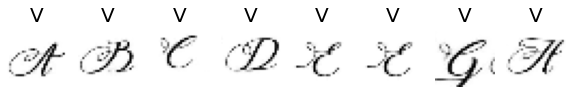

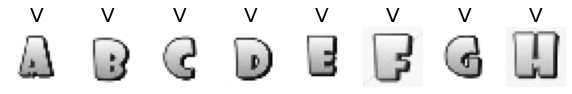

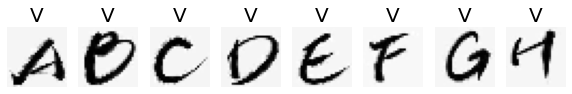

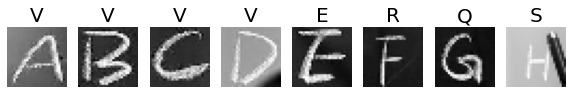

In [27]:
Y_text_svm = []
for i in range(8):
    max_leng= np.zeros(26)
    max_leng[i]=1
    Y_text_svm.append(max_leng)
X_text_svm1 = np.array(X_text1).reshape(-1,784).astype('float32')
X_text_svm2 = np.array(X_text2).reshape(-1,784).astype('float32')
X_text_svm3 = np.array(X_text3).reshape(-1,784).astype('float32')
X_text_svm4 = np.array(X_text4).reshape(-1,784).astype('float32')
svm = pickle.load(open('model12', 'rb'))
                  
y_pred_text1= svm.predict(X_text_svm1)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text1[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text1[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text2= svm.predict(X_text_svm2)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text2[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text2[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text3= svm.predict(X_text_svm3)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text3[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text3[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)


y_pred_text4= svm.predict(X_text_knn4)
plt.figure(figsize=(10, 10))
a= 0;
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(X_text4[i], cmap = 'gray')
    plt.title(alphabets[y_pred_text4[i]], fontsize=20)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)